BY:

### Carbon Credit Chronicles: Unraveling the Impact of Initiatives on Climate Change through Time Series Analysis ###

**What are carbon credits?**

Carbon credits are tradable permits representing a reduction in greenhouse gas emissions. Entities exceeding emission limits buy credits, while those below can sell, creating economic incentives for emission reduction. The system aims to encourage a transition to cleaner practices and technologies.

**Business Understanding**

In the contemporary era of environmental consciousness, businesses are increasingly investing in carbon credit initiatives to mitigate their ecological footprint. Understanding the true impact of these projects is crucial for regulatory bodies, investors, and researchers alike. This study seeks to delve into the intricacies of emission patterns before and after the implementation of carbon credit projects, employing advanced time series analysis techniques to unveil meaningful insights.



**Problem Statement**

As the global business landscape shifts towards sustainability, there is a growing need to comprehensively evaluate the effectiveness of carbon credit initiatives in curbing emissions. This study addresses the challenge of systematically assessing the impact of these projects on emission patterns through a rigorous time series analysis. The question at the forefront is: Do carbon credit initiatives significantly influence and contribute to the reduction of emissions over time?


**Main Objective**

To conduct a comprehensive time series analysis comparing emissions, aiming to evaluate their influence on emission patterns over time.

**Specific Objectives**

Identify Emission Trends: Analyze historical emissions data to uncover underlying trends over time. This involves exploring long-term patterns and variations to understand the trajectory of emissions before and after the implementation of carbon credit projects.

Assess Seasonal Patterns: Determine the seasonality of emissions, aiming to understand recurring patterns throughout the year. This objective seeks to identify if there are specific times or seasons when emissions tend to peak or decline, providing valuable insights into the temporal dynamics of carbon footprints.


Detect Anomalies and Outliers: Employ advanced anomaly detection techniques to identify unusual spikes or drops in emissions. This objective aims to pinpoint instances where the carbon credit initiatives might have had a sudden and significant impact, or conversely, instances where they may not have been as effective as expected.

Analyze Correlations: Investigate correlations between the implementation of carbon credit projects and changes in emission patterns. This involves exploring statistical relationships to determine whether the introduction of carbon credit initiatives correlates with observable shifts in emission trends, providing evidence of their efficacy.

Predictive Modeling for Carbon Credit Impact: Develop predictive models focusing on estimating the impact of future carbon credit projects. By forecasting potential emission reductions based on historical data and project parameters, this objective aims to provide a forward-looking perspective on the effectiveness of carbon credit initiatives.



In [133]:
#import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm  
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
df = pd.read_csv("./data/annual-co2-emissions-per-country.csv")
df1 = pd.read_csv("./data/cumulative-co-emissions.csv")

# Merge based on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(df, df1, on=['Entity', 'Code', 'Year'])

In [135]:
# Merging df3 with the previously merged DataFrame based on 'Entity', 'Code', and 'Year'
df3 = pd.read_csv("./data/change-co2-annual-pct.csv")
merged_df = pd.merge(merged_df, df3, on=['Entity', 'Code', 'Year'])

df4 = pd.read_csv('./data/annual-share-of-co2-emissions.csv')
# Merging df4 with the existing merged DataFrame based on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(merged_df, df4, on=['Entity', 'Code', 'Year'])
df5 = pd.read_csv('./data/co-emissions-per-capita.csv')
merged_df = pd.merge(merged_df, df5, on=['Entity', 'Code', 'Year'])

In [136]:
# Display the updated merged DataFrame
merged_df.head()

,Entity,Code,Year,Annual CO₂ emissions,Cumulative CO₂ emissions,Annual CO₂ emissions growth (%),Share of global annual CO₂ emissions,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1950,84272.0,98928.0,475.000000,0.001421,0.011266
1,Afghanistan,AFG,1951,91600.0,190528.0,8.695650,0.001435,0.012098
2,Afghanistan,AFG,1952,91600.0,282128.0,0.000000,0.001416,0.011946
3,Afghanistan,AFG,1953,106256.0,388384.0,15.999996,0.001598,0.013685
4,Afghanistan,AFG,1954,106256.0,494640.0,0.000000,0.001565,0.013511


In [137]:
#check for missing values
merged_df.isnull().sum()

Entity                                     0
Code                                    3057
Year                                       0
Annual CO₂ emissions                       0
Cumulative CO₂ emissions                   0
Annual CO₂ emissions growth (%)            0
Share of global annual CO₂ emissions       0
Annual CO₂ emissions (per capita)          0
dtype: int64

In [138]:
merged_df = merged_df.drop(['Code'], axis=1)

In [139]:
merged_df.shape

(24196, 7)

In [140]:
merged_df.head()

,Entity,Year,Annual CO₂ emissions,Cumulative CO₂ emissions,Annual CO₂ emissions growth (%),Share of global annual CO₂ emissions,Annual CO₂ emissions (per capita)
0,Afghanistan,1950,84272.0,98928.0,475.000000,0.001421,0.011266
1,Afghanistan,1951,91600.0,190528.0,8.695650,0.001435,0.012098
2,Afghanistan,1952,91600.0,282128.0,0.000000,0.001416,0.011946
3,Afghanistan,1953,106256.0,388384.0,15.999996,0.001598,0.013685
4,Afghanistan,1954,106256.0,494640.0,0.000000,0.001565,0.013511


In [141]:
#Load the datasets by organization
df1 = pd.read_csv('./data/credits/ACR/ACR Issuances.csv')
df2 = pd.read_csv('./data/credits/CAR/CAR Issuances.csv')
df3 = pd.read_csv('./data/credits/Gold/Gold Issuances.csv')

# Assign the organization the dataset is from.
df1['Organization'] = 'ACR'
df2['Organization'] = 'CAR'
df3['Organization'] = 'Gold'

In [142]:

#Load the projects data
df1_projects = pd.read_csv('./data/credits/ACR/ACR Projects.csv')
df2_projects = pd.read_csv('./data/credits/CAR/CAR Projects.csv')
df3_projects = pd.read_csv('./data/credits/Gold/Gold Projects.csv')

#Rename the GS_ID to Project ID for merging.
df3_projects.rename(columns={'GS_ID': 'Project ID'}, inplace=True)

In [143]:
df1.rename(columns={'Issuance \r\nYear': 'Issuance Year', 'Total Credits Issued': 'Total Offset Credits Issued'}, inplace=True)
df2.rename(columns={'Issuance \r\nYear': 'Issuance Year'}, inplace=True)
df3.rename(columns={'Issuance \r\nYear': 'Issuance Year', 'Country':'Project Site Country', 'Quantity':'Total Offset Credits Issued'}, inplace=True)


In [144]:
def createNewDf(df, projects_df):
    columns = ["Project ID", "Total Offset Credits Issued", "Project Site Country", "Issuance Year", "Organization"]
    new_df = df[columns].copy()
    merged_new_df = pd.merge(new_df, projects_df[['Project ID', 'Project Name']], on='Project ID', how='left')
    return merged_new_df

In [145]:
new_df1 = createNewDf(df1, df1_projects)
new_df2 = createNewDf(df2, df2_projects)
new_df3 = createNewDf(df3, df3_projects)


In [146]:
merged_org_df = pd.concat([new_df1, new_df2, new_df3], ignore_index=True)
merged_org_df.shape

(16537, 6)

In [147]:
merged_org_df.head()

,Project ID,Total Offset Credits Issued,Project Site Country,Issuance Year,Organization,Project Name
0,ACR167,125000,US,2002,ACR,Nitrogen Oxide Abatement at the DuPont Sabine ...
1,ACR163,500,US,2004,ACR,Des Plaines LFG to Energy
2,ACR103,5825,US,2005,ACR,Inland Empire Anaerobic Ag Digester
3,ACR103,8023,US,2005,ACR,Inland Empire Anaerobic Ag Digester
4,ACR163,1000,US,2005,ACR,Des Plaines LFG to Energy


In [148]:
merged_org_df.isnull().sum()

Project ID                     0
Total Offset Credits Issued    0
Project Site Country           0
Issuance Year                  0
Organization                   0
Project Name                   3
dtype: int64

In [149]:
merged_org_df.dropna()

,Project ID,Total Offset Credits Issued,Project Site Country,Issuance Year,Organization,Project Name
0,ACR167,125000,US,2002,ACR,Nitrogen Oxide Abatement at the DuPont Sabine ...
1,ACR163,500,US,2004,ACR,Des Plaines LFG to Energy
2,ACR103,5825,US,2005,ACR,Inland Empire Anaerobic Ag Digester
3,ACR103,8023,US,2005,ACR,Inland Empire Anaerobic Ag Digester
4,ACR163,1000,US,2005,ACR,Des Plaines LFG to Energy
...,...,...,...,...,...,...
16532,GS997,4947,India,2017,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16533,GS997,5869,India,2019,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16534,GS997,5879,India,2019,Gold,LAYA Paderu Energy Efficient Woodstoves Project
16535,GS997,6110,India,2022,Gold,LAYA Paderu Energy Efficient Woodstoves Project


In [150]:
merged_org_df.rename(columns={'Issuance Year': 'Year'}, inplace=True)


In [151]:

# Merge the datasets on the shared variable ('Issuance Year') and filter years between 2002 and 2021
merged_data= merged_df.merge(merged_org_df, on='Year', how='inner')
merged_data = merged_data[(merged_data['Year'] >= 2002) & (merged_data['Year'] <= 2021)]
merged_data['Total Offset Credits Issued'] = pd.to_numeric(merged_data['Total Offset Credits Issued'], errors='coerce')


In [152]:
# Convert the Year column to datetime format 
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')

In [153]:
# Convert the Total Offset Credits Issued column into numeric data type
merged_org_df['Total Offset Credits Issued'] = merged_org_df['Total Offset Credits Issued'].apply(pd.to_numeric, errors='coerce')

In [154]:
merged_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16537 entries, 0 to 16536
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   16537 non-null  object 
 1   Total Offset Credits Issued  16536 non-null  float64
 2   Project Site Country         16537 non-null  object 
 3   Year                         16537 non-null  int64  
 4   Organization                 16537 non-null  object 
 5   Project Name                 16534 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 775.3+ KB


## Exploratory Data Analysis

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
%matplotlib inline

In [156]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')

### 1. Top emitters by continent in 2022

In [157]:
continents_to_analyze = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# Filter the DataFrame for the year 2022
filtered_df = merged_df[(merged_df['Year'] == 2022) & (merged_df['Entity'].isin(continents_to_analyze))]

# Sort the DataFrame by 'Annual CO₂ emissions' in descending order for each continent
sorted_continent_df = filtered_df.sort_values(by=['Entity', 'Annual CO₂ emissions'], ascending=[True, False])

# Select the top emitter for each continent
top_emitters_by_continent = sorted_continent_df.groupby('Entity').head(1)

# Use Plotly Express for interactive bar chart
fig = px.bar(top_emitters_by_continent, x='Entity', y='Annual CO₂ emissions',
             labels={'Annual CO₂ emissions': 'Annual CO₂ Emissions', 'Entity': 'Continent'},
             title='Top Emitters by Continent in 2022',
             template='plotly_dark')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Continent',
    yaxis_title='Annual CO₂ Emissions'
)

# Show the interactive chart
fig.show()

In the year 2022, Asia emerged as the top CO2 emitter, releasing over 20 billion tonnes of CO2 into the atmosphere. This high emission level can be attributed to countries such as China, India, South Korea, and Japan, which rank among the world's top emitters of CO2. China alone emitted 11.4 billion metric tonnes of CO2 in 2022, solidifying its position as the world's largest polluter. In contrast, Europe and North America have made significant investments in reducing carbon emissions, primarily by phasing out coal plants, resulting in a considerable decline in emissions over the years. Meanwhile, Africa, Oceania, and South America are relatively smaller emitters, as depicted in the plot above.

### 2. Top CO₂ Emitting Countries Classified by Income Levels

In [158]:
income_categories_to_analyze = ['High-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries']

# Filter the DataFrame for the year 2022 and relevant income categories
filtered_df = merged_df[(merged_df['Year'] == 2022) & (merged_df['Entity'].isin(income_categories_to_analyze))]

# Sort the DataFrame by 'Annual CO₂ emissions' in descending order for each income category
sorted_income_df = filtered_df.sort_values(by=['Entity', 'Annual CO₂ emissions'], ascending=[True, False])

# Select the top emitter for each income category
top_emitters_by_income = sorted_income_df.groupby('Entity').head(1)

# Use Plotly Express for an interactive bar chart
fig = px.bar(top_emitters_by_income, x='Entity', y='Annual CO₂ emissions',
             labels={'Annual CO₂ emissions': 'Annual CO₂ Emissions', 'Entity': 'Income Category'},
             title='Top Emitters by Income Category in 2022',
             template='plotly_dark')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Income Category',
    yaxis_title='Annual CO₂ Emissions'
)

# Show the interactive chart
fig.show()

Among the Upper-middle-income countries are China, Brazil, Russia, and South Africa, which rank among the world's largest emitters of greenhouse gases (GHG), collectively emitting over 15 billion metric tonnes of CO2. A significant number of high-income countries are located in Europe and North America. These nations have made substantial reductions in their carbon emissions over the years. In contrast, the majority of African countries fall into the low-income category and are generally small emitters, as depicted in the visualization.

### 3. Top 3 CO₂ emitting countries worldwide

In [159]:
# List of entities to exclude
entities_to_exclude = ['World', 'High-income countries', 'Upper-middle-income countries',' Lower-middle-income countries', 
                       'Low-income countries',' Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 
                       'Asia (excl. China and India)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 
                       'European Union (27)', 'European Union (28)', 'North America (excl. USA)']

# Filter the DataFrame and exclude the specified entities
#filtered_df = merged_df[(~merged_df['Entity'].isin(entities_to_exclude)) & (merged_df['Year'] >= 2016)]
filtered_df = merged_df[(~merged_df['Entity'].isin(entities_to_exclude)) & (merged_df['Year'] >= pd.to_datetime('2016'))]


# Sort the filtered DataFrame by 'Annual CO₂ emissions' in descending order
sorted_df = filtered_df.sort_values(by='Annual CO₂ emissions', ascending=False)

# Display only the top 20 entities
top_20_df = sorted_df.head(20)

# Create an area chart using Plotly Express
fig = px.area(top_20_df, x='Year', y='Annual CO₂ emissions', color='Entity',
              title='Trend of CO₂ Emissions Over Time from 2016 (Top 3 Entities)',
              labels={'Annual CO₂ emissions': 'CO₂ Emissions', 'Entity': 'Country'},
              template='plotly_dark')

# Show the interactive chart
fig.show()

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



CO₂ emissions have exhibited a consistent upward trend since 2016 in the three countries, as illustrated in the plot. In 2006, China surpassed the U.S. to become the world's largest emitter of greenhouse gases (GHG). China remains a substantial contributor to global GHG emissions, followed closely by the U.S. and India. Together, these three nations are responsible for nearly half of the world's GHG emissions.



### 4. cumulative CO₂ emissions over time for China, the United States, and India

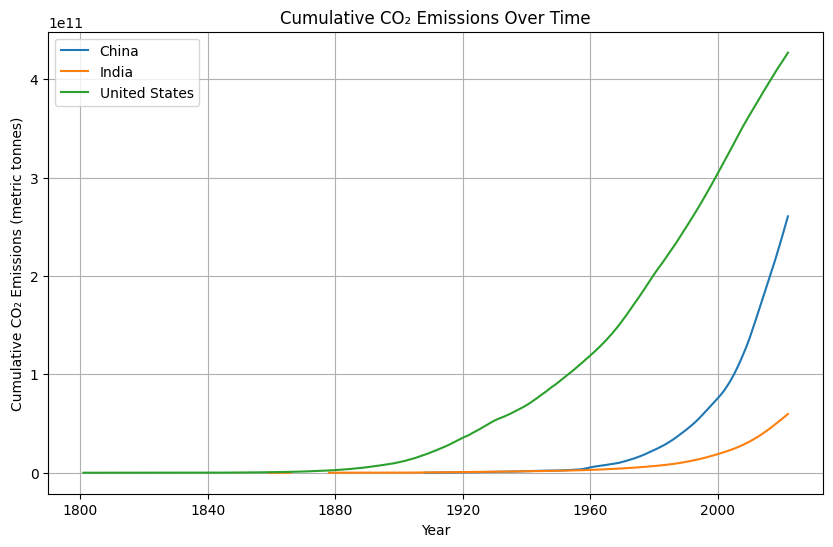

In [160]:
# Filter data for China, US, and India
top_countries_df = merged_df[merged_df['Entity'].isin(['China', 'United States', 'India'])]

# Pivot the DataFrame to have Entity as index and Year as columns
pivot_df = top_countries_df.pivot(index='Entity', columns='Year', values='Cumulative CO₂ emissions')

# Plotting
plt.figure(figsize=(10, 6))

for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)

plt.title('Cumulative CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative CO₂ Emissions (metric tonnes)')
plt.legend()
plt.grid(True)
plt.show()

Throughout the 1800s, CO2 emissions for the US remained relatively low, but began to rise steadily around the turn of the 20th century, peaking in the 1900s and continuing to grow thereafter. The US was the world's largest emitter of CO2 until 2006, when China surpassed it to become the world's largest polluter. China's emissions started to increase around the 1970s and experienced a sharp rise in the 2000s. On the other hand, India, the third-largest emitter of CO2 in the world, had relatively low emissions until the 1970s, after which it began to steadily increase.

### 5.  Year-on-year change in CO₂ emissions for China, the United States, and India

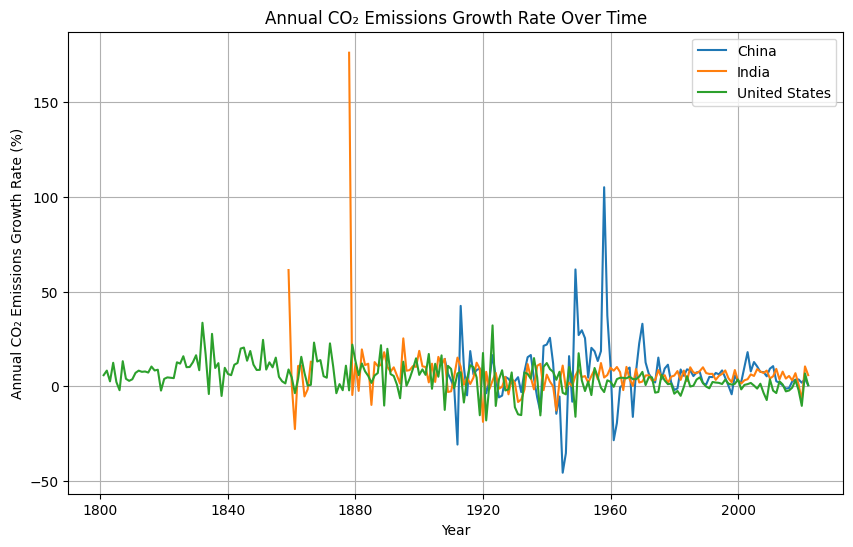

In [161]:
top_countries_df = merged_df[merged_df['Entity'].isin(['China', 'United States', 'India'])]

# Pivot the DataFrame to have Entity as index and Year as columns
pivot_df = top_countries_df.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions growth (%)')

# Plotting
plt.figure(figsize=(10, 6))

for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)

plt.title('Annual CO₂ Emissions Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

This interactive chart displays the year-on-year growth in annual CO₂ emissions for selected countries.

A positive figure indicates that emissions in a given year were higher than the previous year.
A negative figure indicates that emissions were lower than the previous year.

Two notable events impacted emissions trends:

1. 2008 Economic Recession: The economic recession of 2008 resulted in a reduction in electricity demand. Additionally, fossil fuel electricity with high marginal costs became too expensive to operate, leading to a decline in both carbon emissions from power generation and the Carbon Emission Intensity (CEI).

2. COVID-19 Pandemic: The global crisis caused by the COVID-19 epidemic led to an unprecedented reduction in daily carbon dioxide emissions in 2020 due to reduced economic activities.

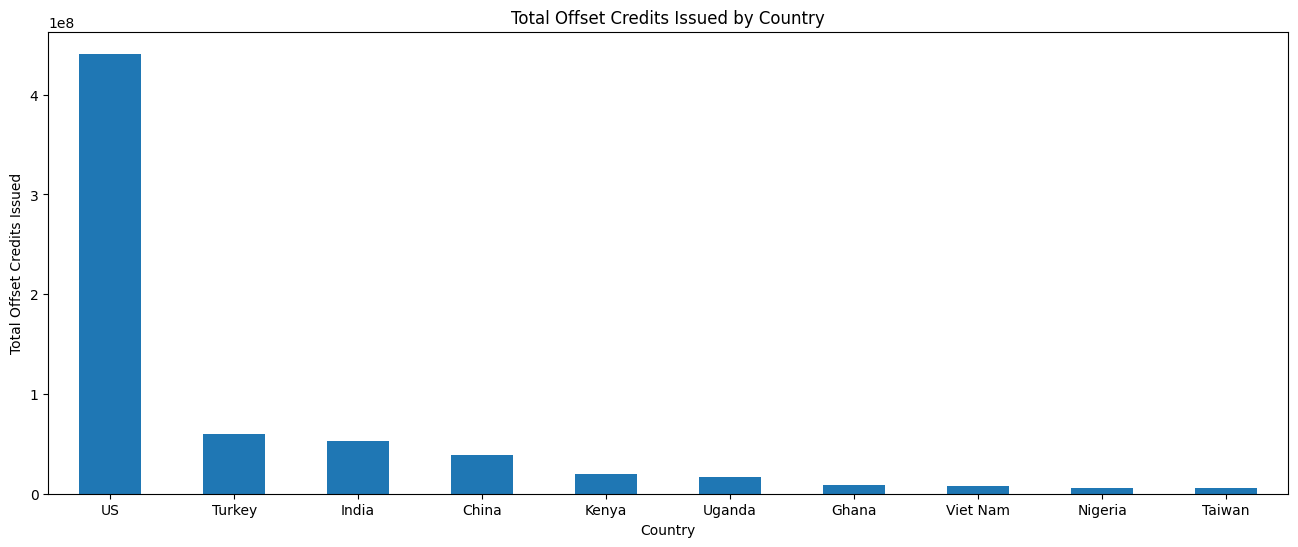

In [162]:
# Top countries by credits issued

#Top 10 Countries issuing the credits
credits_by_country = merged_org_df.groupby('Project Site Country')['Total Offset Credits Issued'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
credits_by_country.plot(kind='bar')
plt.title('Total Offset Credits Issued by Country')
plt.xlabel('Country')
plt.ylabel('Total Offset Credits Issued')
plt.xticks(rotation=0)
plt.show()


The US significantly accounts for most of the credits issued across the globe. However, countries like China and India, despite their enourmous amounts of emissions, had almost similar number of credits issued with a developing country like Kenya, which accounts for almost an unsignificant percentage of emissions. 

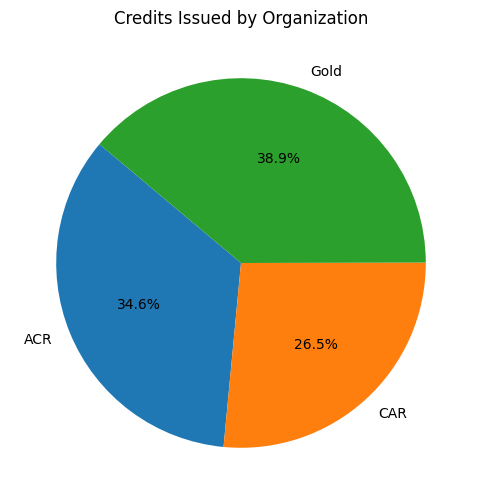

In [163]:
# Credits issued by organizations
credits_by_org = merged_org_df.groupby('Organization')['Total Offset Credits Issued'].sum()

plt.figure(figsize=(16,6))
plt.pie(credits_by_org, labels=credits_by_org.index, autopct='%1.1f%%', startangle=140)
plt.title('Credits Issued by Organization')
plt.show()

Gold projects issued most of the credits.

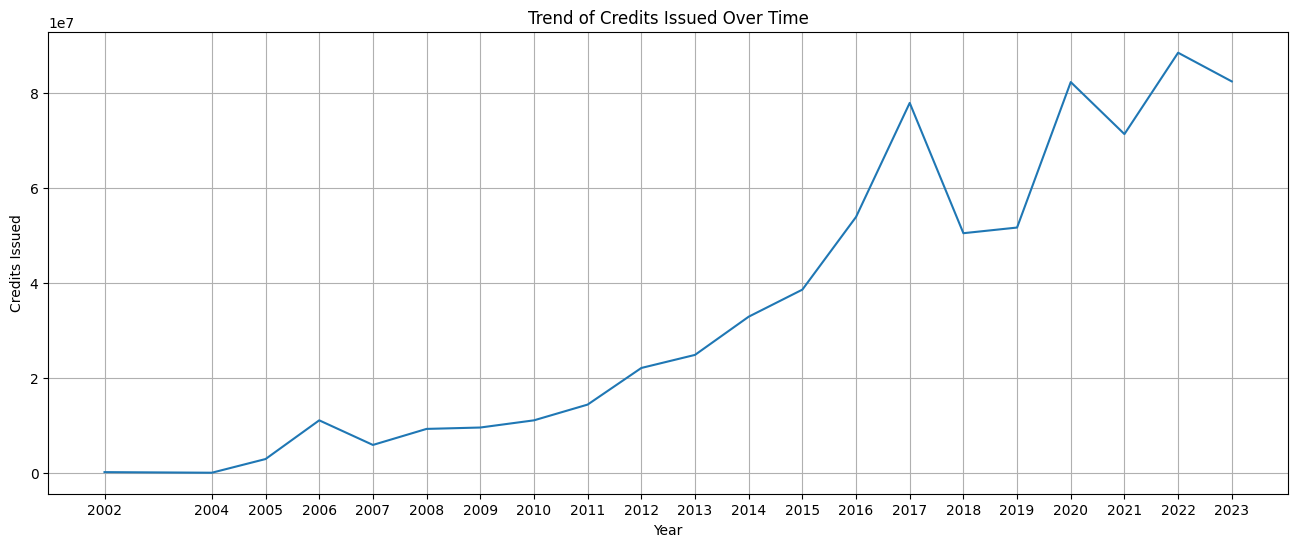

In [164]:
# Trend of Credits Issued over the Years

# Groupby year, then calculate the total credits issued each year
total_credits_by_year = merged_org_df.groupby(merged_org_df['Year'])['Total Offset Credits Issued'].sum()

# Plot total credits issued over time
plt.figure(figsize=(16,6))
total_credits_by_year.plot(kind='line')
plt.title('Trend of Credits Issued Over Time')
plt.xlabel('Year')
plt.ylabel('Credits Issued')
plt.xticks(total_credits_by_year.index)  # Set x-ticks to the years
plt.grid(True)
plt.show()

There is an upward trend for the number of credits issued. However, there was a slight drop between 2017 and 2019, maybe due to the COVID-19 pandemic

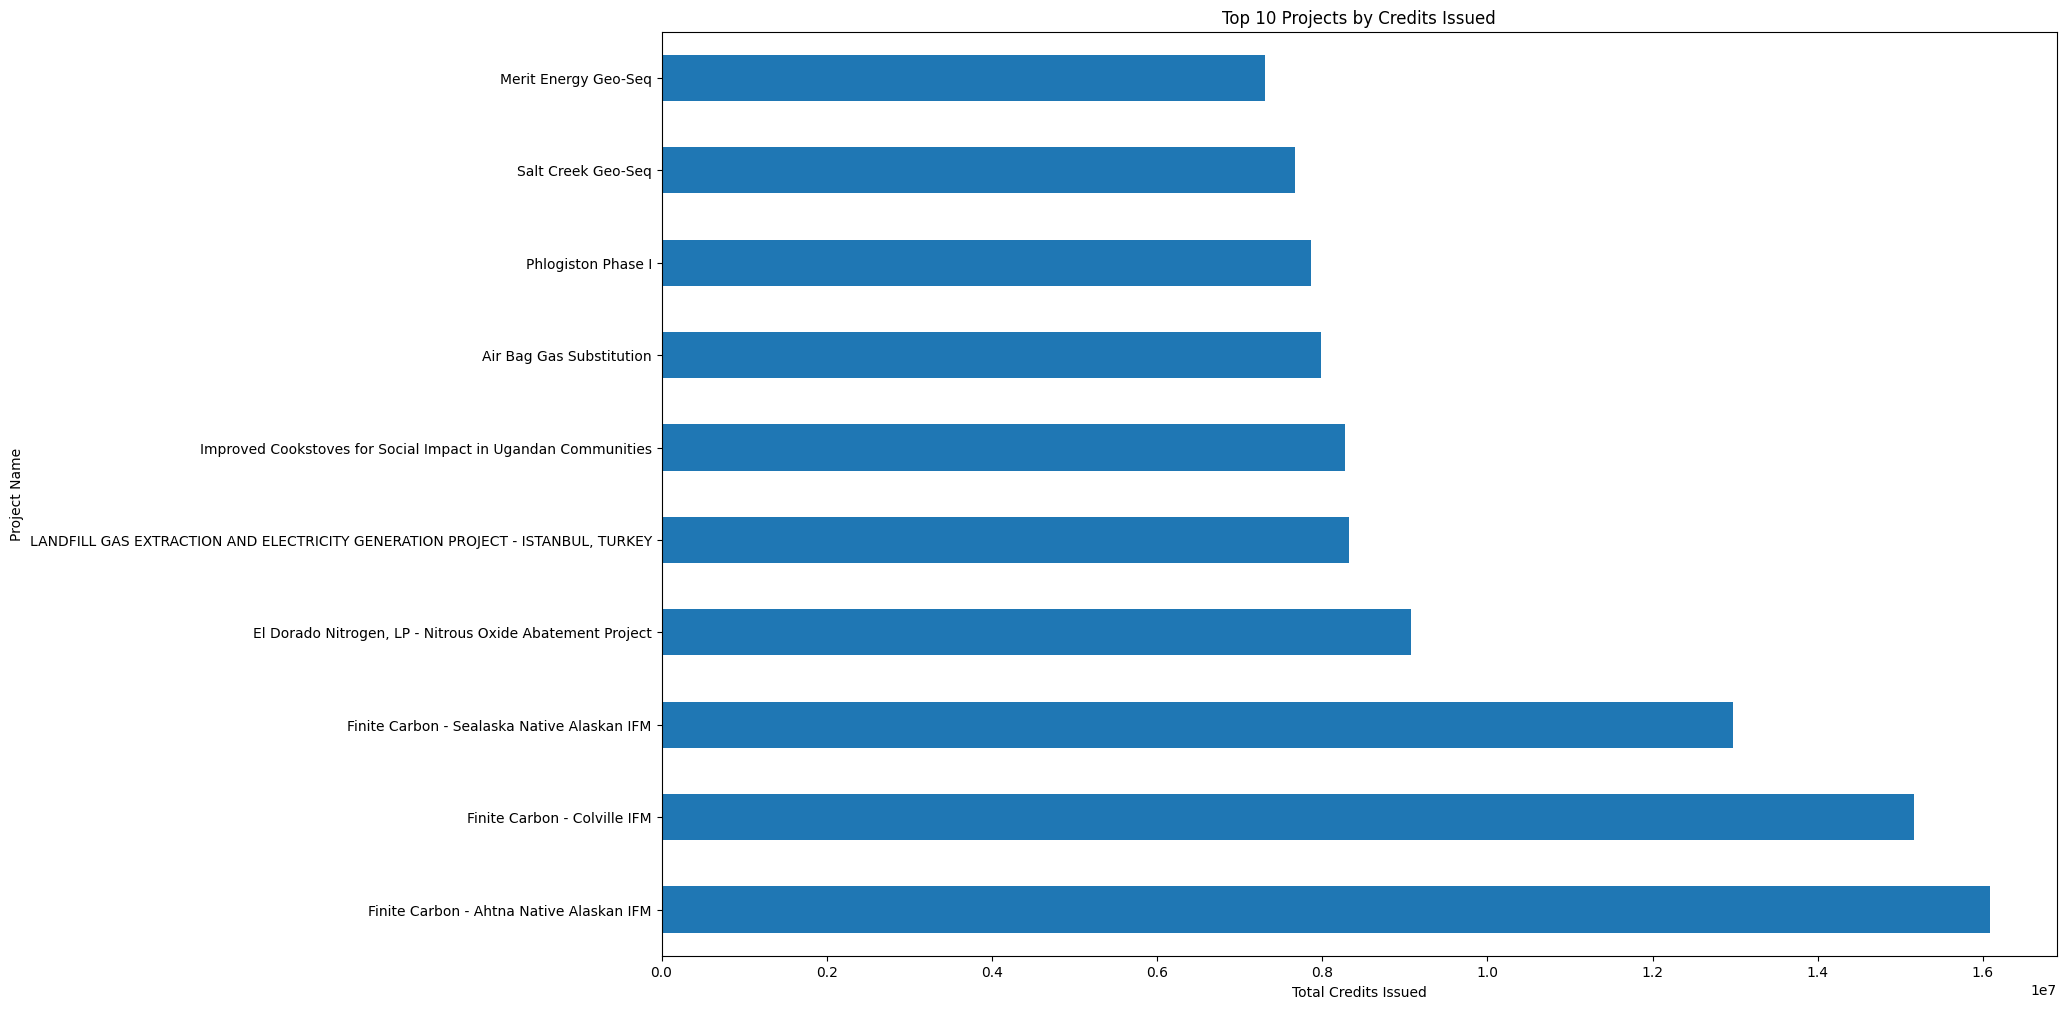

In [165]:
# Credits issued by project name
#Project names
project_names = merged_org_df.groupby('Project Name')['Total Offset Credits Issued'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,12))
project_names.plot(kind='barh')
plt.title('Top 10 Projects by Credits Issued')
plt.xlabel('Total Credits Issued')
plt.ylabel('Project Name')
plt.xticks(rotation=0)
plt.show()


Finite Carbon - Ahtma Native Alaskan IFM project had the highest number of credits among all projects, followed by the Finite Carbon - Calville IFM, Finite Carbon - Sealaska Native Alaskan IFM, El Dorado Nitrogen, LP - Nitrous Oxide Abatement Project, and Landfill Gas Fixtation and Electricity Generation Project in Instanbul, Turkey, respectively. 

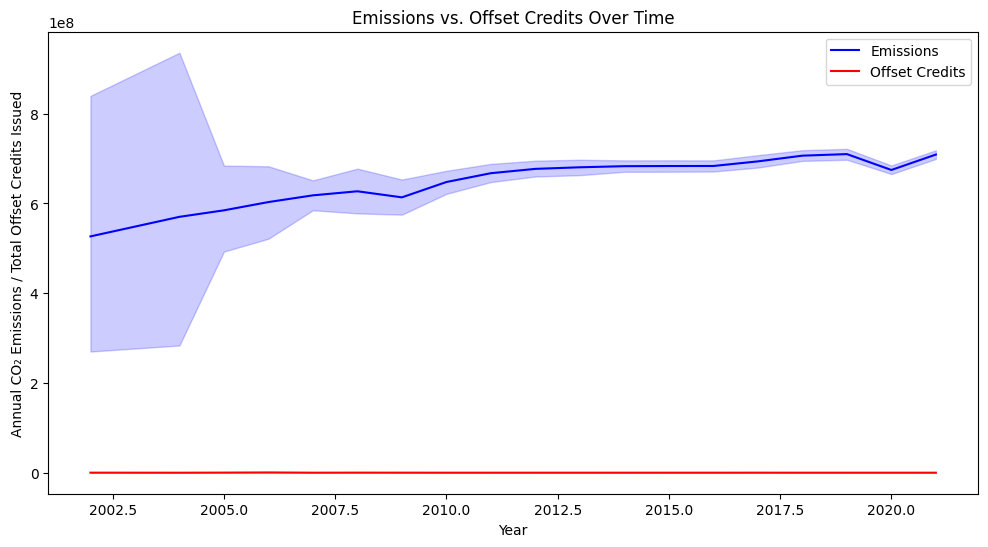

In [166]:
# Plotting emissions vs. offset credits
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions', data=merged_data, label='Emissions', color='blue')
sns.lineplot(x='Year', y='Total Offset Credits Issued', data=merged_data, label='Offset Credits', color='red')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions / Total Offset Credits Issued')
plt.title('Emissions vs. Offset Credits Over Time')
plt.legend()
plt.show()

In [167]:
# Set 'Year' column as the index
merged_df.set_index('Year', inplace=True)

In [168]:
# Correlation analysis
from scipy.stats import pearsonr, spearmanr
correlation_pearson, _ = pearsonr(merged_df['Annual CO₂ emissions'], merged_df['Cumulative CO₂ emissions'])
correlation_spearman, _ = spearmanr(merged_df['Annual CO₂ emissions'], merged_df['Cumulative CO₂ emissions'])
print("Pearson correlation coefficient:", correlation_pearson)
print("Spearman correlation coefficient:", correlation_spearman)

Pearson correlation coefficient: 0.9461472986670074
Spearman correlation coefficient: 0.9786521376347804


In [169]:
# Hypothesis testing - testing correlation significance
alpha = 0.05  # significance level
p_value_pearson = 0
p_value_spearman = 0
if abs(correlation_pearson) < 1:
    p_value_pearson = 2 * (1 - abs(correlation_pearson))
if abs(correlation_spearman) < 1:
    p_value_spearman = 2 * (1 - abs(correlation_spearman))
print("Pearson correlation p-value:", p_value_pearson)
print("Spearman correlation p-value:", p_value_spearman)
if p_value_pearson < alpha:
    print("Pearson correlation is statistically significant")
else:
    print("Pearson correlation is not statistically significant")
if p_value_spearman < alpha:
    print("Spearman correlation is statistically significant")
else:
    print("Spearman correlation is not statistically significant")

Pearson correlation p-value: 0.10770540266598516
Spearman correlation p-value: 0.042695724730439144
Pearson correlation is not statistically significant
Spearman correlation is statistically significant


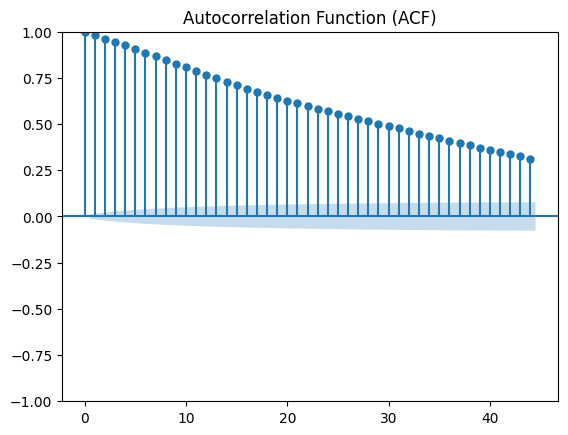

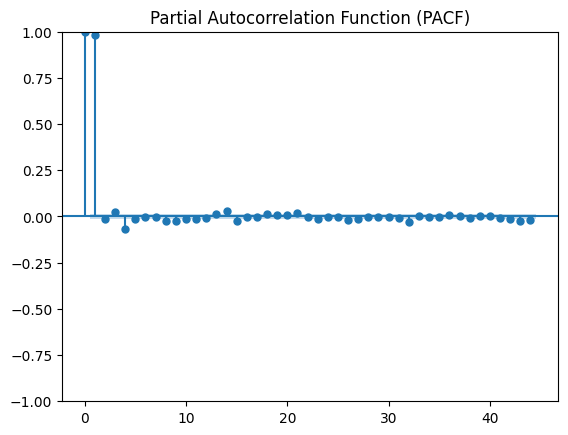

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(merged_df['Annual CO₂ emissions'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF plot
plot_pacf(merged_df['Annual CO₂ emissions'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [171]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_df['Annual CO₂ emissions'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -15.589947987673465
p-value: 1.8856650786238575e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Augmented Dickey-Fuller (ADF) test, is used to test for the presence of a unit root in a time series dataset, indicating whether the series is stationary or not.

Interpretation:
* The ADF test results suggest that the time series data is stationary. This conclusion is supported by the very low p-value, indicating strong evidence against the presence of a unit root. Additionally, the ADF statistic is lower than all the critical values at the 1%, 5%, and 10% significance levels, further supporting the rejection of the null hypothesis of non-stationarity. Therefore, the time series data is likely stationary, which is often desirable for many time series analysis techniques.

In [172]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 3  # Choose maximum lag for the test
granger_test_result = grangercausalitytests(merged_df[['Annual CO₂ emissions', 'Cumulative CO₂ emissions']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=361.7669, p=0.0000  , df_denom=24192, df_num=1
ssr based chi2 test:   chi2=361.8118, p=0.0000  , df=1
likelihood ratio test: chi2=359.1332, p=0.0000  , df=1
parameter F test:         F=361.7669, p=0.0000  , df_denom=24192, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=182.1917, p=0.0000  , df_denom=24189, df_num=2
ssr based chi2 test:   chi2=364.4586, p=0.0000  , df=2
likelihood ratio test: chi2=361.7408, p=0.0000  , df=2
parameter F test:         F=182.1917, p=0.0000  , df_denom=24189, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=172.7981, p=0.0000  , df_denom=24186, df_num=3
ssr based chi2 test:   chi2=518.5442, p=0.0000  , df=3
likelihood ratio test: chi2=513.0652, p=0.0000  , df=3
parameter F test:         F=172.7981, p=0.0000  , df_denom=24186, df_num=3


Granger causality is a statistical concept used to determine whether one time series variable can predict another.

* Number of Lags: This refers to the number of past observations of the variables being considered in the test. Each test is performed with a specific number of lags, which indicates how far back in time the influence of one variable on another is considered.

* SSR-based F Test: This test compares the fit of a model with lagged values of the potentially causing variable against the fit of a model without those lagged values. The F-statistic measures the ratio of the explained variation to the unexplained variation in the model. The reported p-value indicates the significance level of the test. In all cases, the p-values are extremely low (p=0.0000), suggesting strong evidence against the null hypothesis that the potentially causing variable does not Granger-cause the other variable.

* SSR-based Chi-squared Test: This test is another way to assess the significance of Granger causality. Like the F-test, it compares the fit of models with and without lagged values of the potentially causing variable. The reported p-values are very low, indicating strong evidence against the null hypothesis of no Granger causality.

* Likelihood Ratio Test: This is a statistical test used to compare the fit of two models, one with the lagged values of the potentially causing variable and one without. Again, the extremely low p-values suggest strong evidence against the null hypothesis.

* Parameter F Test: This test assesses the joint significance of all lagged values of the potentially causing variable. As with the other tests, the p-values are very low, indicating strong evidence against the null hypothesis.

In conclusion, the results indicate that there is strong evidence of Granger causality between the variables being tested, regardless of the number of lags considered. This suggests that the potentially causing variable has predictive power over the other variable.




In [173]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# merged_df.set_index('Year', inplace=True)

# # Infer the frequency of the DatetimeIndex
# freq = pd.infer_freq(merged_df.index)

# # If the frequency is None, set it explicitly to 'AS'
# if freq is None:
#     merged_df.index.freq = 'AS'
# else:
#     merged_df.index.freq = freq



# # Decompose the time series into trend, seasonal, and residual components
# decomposition = seasonal_decompose(merged_df['Annual CO₂ emissions'], model='additive')

# # Plot the decomposed components
# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# plt.plot(decomposition.trend)
# plt.title('Trend')
# plt.subplot(412)
# plt.plot(decomposition.seasonal)
# plt.title('Seasonal')
# plt.subplot(413)
# plt.plot(decomposition.resid)
# plt.title('Residual')
# plt.tight_layout()
# plt.show()


In [174]:
# Drop rows with NaN values
merged_data.dropna(inplace=True)


In [175]:
# # Further causal analysis using Granger causality
# max_lag = 5 
# granger_test_result = grangercausalitytests(merged_data[['Annual CO₂ emissions', 'Total Offset Credits Issued']], max_lag)

C:\Users\Brandon\AppData\Local\Temp\ipykernel_11560\1604155355.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



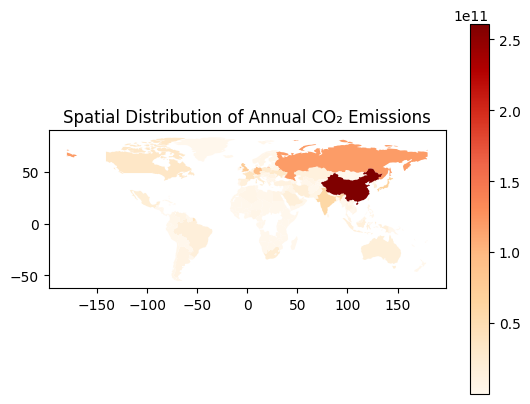

In [176]:
import geopandas as gpd

# Load a world shapefile for visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(merged_df.groupby('Entity')['Annual CO₂ emissions'].sum().reset_index(), left_on='name', right_on='Entity')

# Plot emissions spatially
world.plot(column='Annual CO₂ emissions', cmap='OrRd', legend=True)
plt.title('Spatial Distribution of Annual CO₂ Emissions')
plt.show()


# Time Series Analysis

In [177]:
# Filter data for China, US, and India
world_df = merged_df[merged_df['Entity'].isin(['World'])]
world_df.head()


,Entity,Annual CO₂ emissions,Cumulative CO₂ emissions,Annual CO₂ emissions growth (%),Share of global annual CO₂ emissions,Annual CO₂ emissions (per capita)
Year,,,,,,
1760-01-01,World,10514331.0,108429260.0,1.697254,100.0,0.013482
1770-01-01,World,13097216.0,226734220.0,2.481532,100.0,0.015995
1780-01-01,World,15878726.0,372157800.0,2.211046,100.0,0.017820
1790-01-01,World,20398094.0,554326460.0,2.691734,100.0,0.021896
1800-01-01,World,32798352.0,791920500.0,19.330930,100.0,0.033286


In [178]:
world_emissions = world_df[['Annual CO₂ emissions']].copy()
world_emissions = world_emissions.rename(columns={'Annual CO₂ emissions': 'CO2'})  # Rename the column

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the CO2 data
world_emissions['CO2'] = scaler.fit_transform(world_emissions[['CO2']])


world_emissions.head()



,CO2
Year,
1760-01-01,0.000000
1770-01-01,0.000070
1780-01-01,0.000144
1790-01-01,0.000266
1800-01-01,0.000600


In [179]:
world_emissions.dtypes

CO2    float64
dtype: object

<Axes: xlabel='Year'>

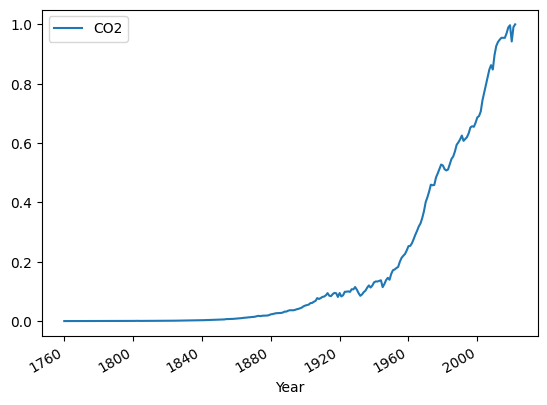

In [180]:
# World emissions over time
world_emissions.plot()

In [181]:
# testing for stationarity
result = adfuller(world_emissions)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.036849980392285
p-value: 0.9987189620252138
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


In [182]:
# Checking for stationarity

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

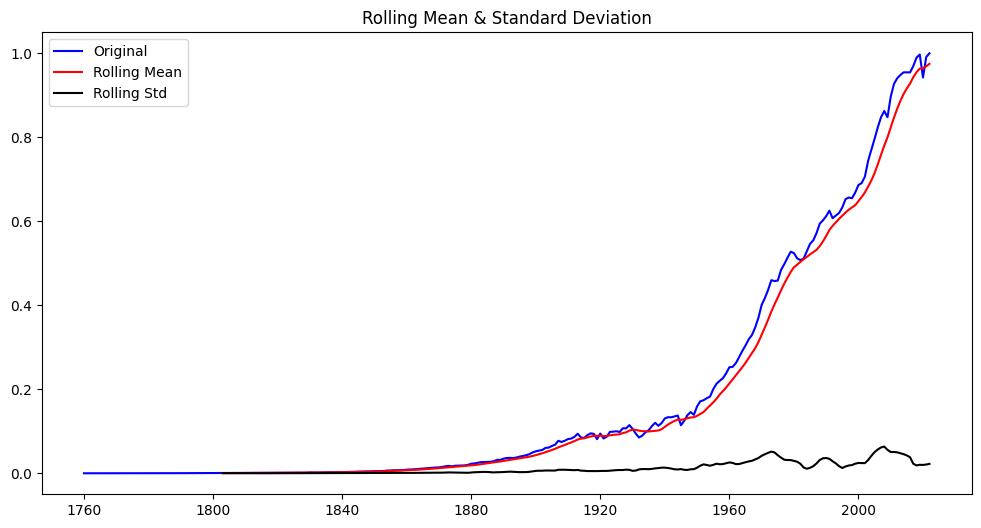

Results of Dickey-Fuller Test: 

Test Statistic                   2.036850
p-value                          0.998719
#Lags Used                      12.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [183]:
stationarity_check(world_emissions)

### 1. Moving Average

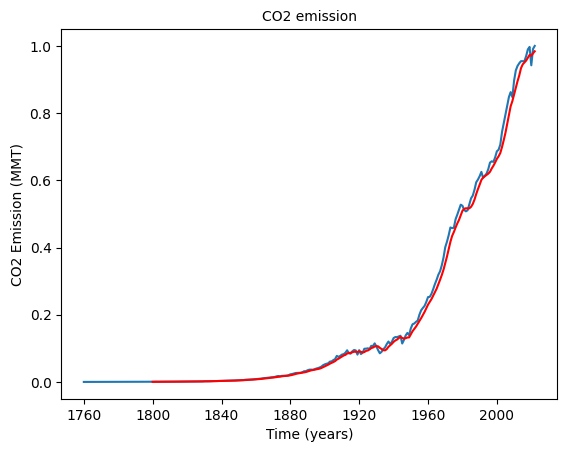

In [184]:
moving_avg = world_emissions.rolling(5).mean()
plt.plot(world_emissions)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('CO2 Emission (MMT)', fontsize = 10)
plt.title('CO2 emission', fontsize = 10)
plt.show()

In [185]:
moving_avg_diff = world_emissions - moving_avg
moving_avg_diff.head(13)

,CO2
Year,
1760-01-01,NaN
1770-01-01,NaN
1780-01-01,NaN
1790-01-01,NaN
1800-01-01,0.000384
1801-01-01,0.000246
1802-01-01,0.000324
1803-01-01,-0.000040
1804-01-01,-0.000041


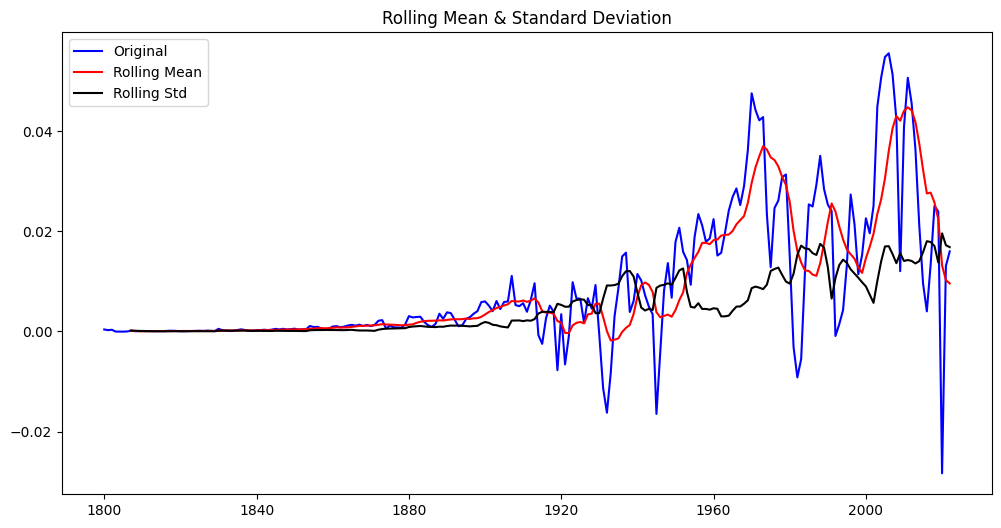

Results of Dickey-Fuller Test: 

Test Statistic                  -1.383195
p-value                          0.590306
#Lags Used                      14.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


In [186]:

moving_avg_diff.dropna(inplace=True)
stationarity_check(moving_avg_diff)

### 2. Differencing

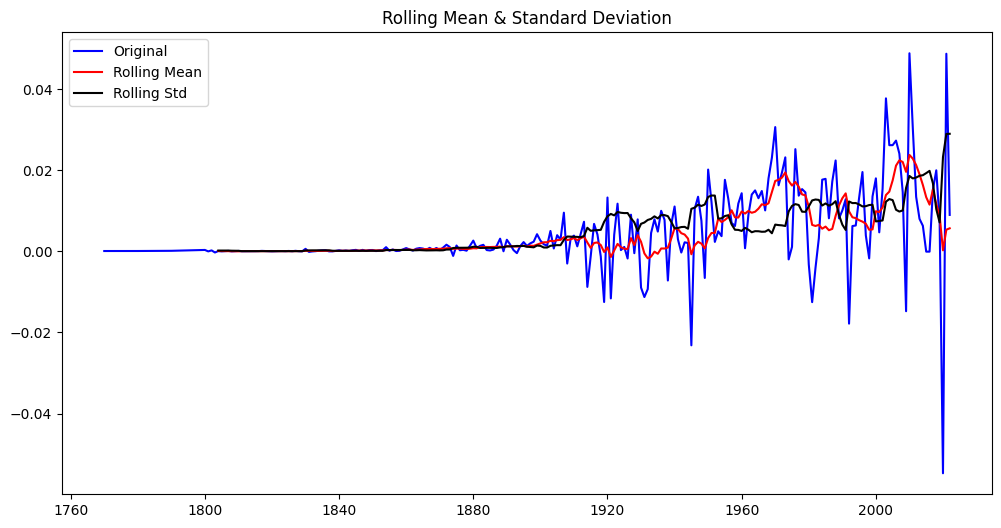

Results of Dickey-Fuller Test: 

Test Statistic                  -2.247679
p-value                          0.189398
#Lags Used                      11.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [187]:
df_first_difference = world_emissions - world_emissions.shift(1)  
stationarity_check(df_first_difference.dropna(inplace=False))

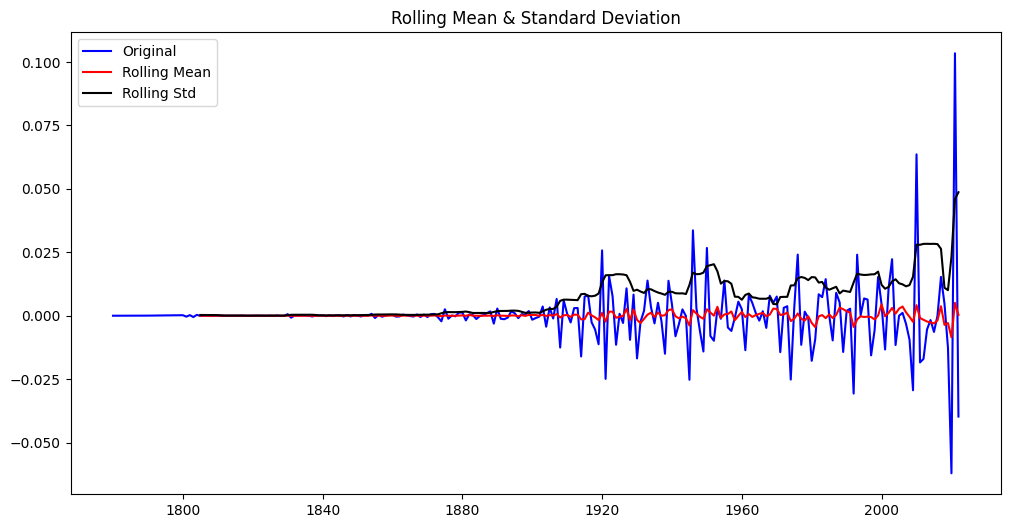

Results of Dickey-Fuller Test: 

Test Statistic                -6.308462e+00
p-value                        3.279036e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


In [188]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  
stationarity_check(df_seasonal_first_difference.dropna(inplace=False))

### 3. Decomposition

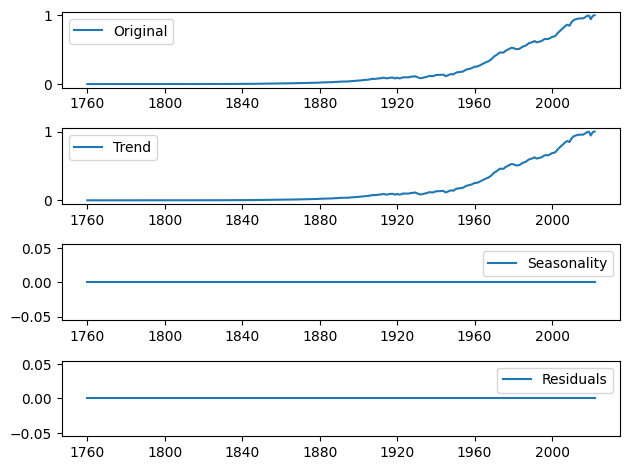

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(world_emissions,period=1,model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(world_emissions, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

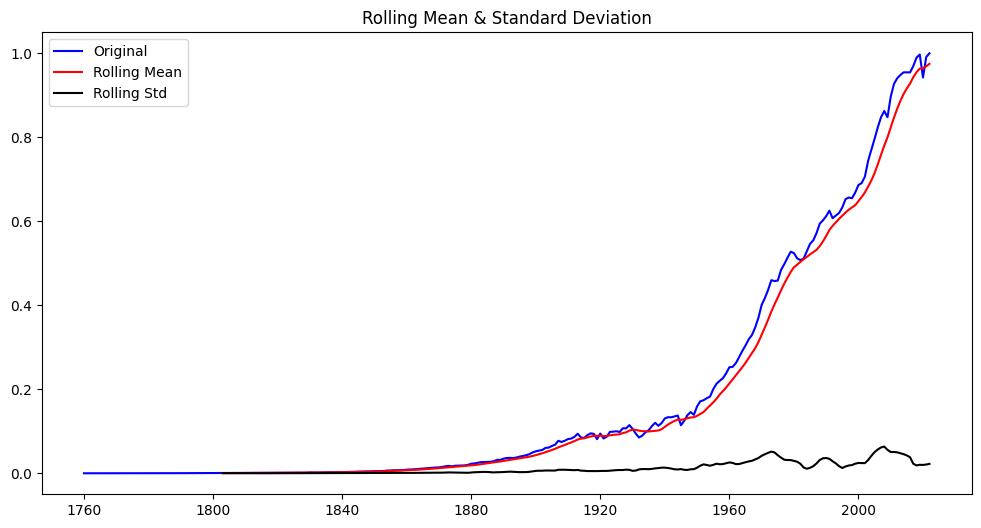

Results of Dickey-Fuller Test: 

Test Statistic                   2.036850
p-value                          0.998719
#Lags Used                      12.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [192]:
df_decompose = trend
df_decompose.dropna(inplace=True)

stationarity_check(df_decompose)


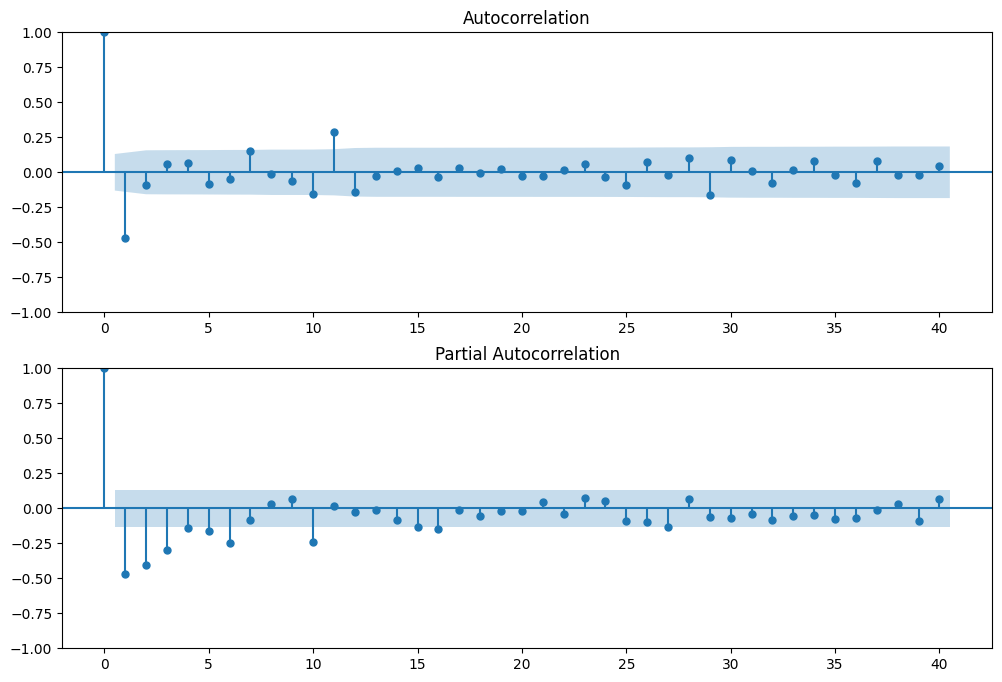

In [193]:
#ACF and PACF plots:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [194]:
#using seasonal first order difference
df_seasonal_first_difference.head()

,CO2
Year,
1760-01-01,NaN
1770-01-01,NaN
1780-01-01,0.000005
1790-01-01,0.000047
1800-01-01,0.000212


In [195]:

X = df_seasonal_first_difference.dropna(inplace=False)

In [196]:
X.head()

,CO2
Year,
1780-01-01,0.000005
1790-01-01,0.000047
1800-01-01,0.000212
1801-01-01,-0.000356
1802-01-01,0.000246


In [197]:
# Create Training and Test
train = X.iloc[:-20]
test = X.iloc[-20:]

In [198]:
print(train.shape,test.shape)

(205, 1) (20, 1)


In [199]:
train.head()

,CO2
Year,
1780-01-01,0.000005
1790-01-01,0.000047
1800-01-01,0.000212
1801-01-01,-0.000356
1802-01-01,0.000246


In [200]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [201]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [202]:
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 3)
q_values = range(0, 3)
# warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0) RMSE=0.034


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(0, 1, 0) RMSE=0.058


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 1, 1) RMSE=0.034


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credi

ARIMA(0, 1, 2) RMSE=0.024


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0) RMSE=0.100


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1) RMSE=0.059


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2) RMSE=0.035


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0) RMSE=0.030


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1) RMSE=0.025
ARIMA(1, 0, 2) RMSE=0.025
ARIMA(1, 1, 0) RMSE=0.043


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credi

ARIMA(1, 1, 1) RMSE=0.030


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2) RMSE=0.033


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0) RMSE=0.070


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credi

ARIMA(1, 2, 1) RMSE=0.043


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2) RMSE=0.033


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0) RMSE=0.027


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(2, 0, 1) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0) RMSE=0.038


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(2, 1, 1) RMSE=0.027


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(2, 1, 2) RMSE=0.028


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0) RMSE=0.057


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(2, 2, 1) RMSE=0.038


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credi

ARIMA(2, 2, 2) RMSE=0.031


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0) RMSE=0.026


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(3, 0, 1) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(3, 0, 2) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0) RMSE=0.033


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(3, 1, 1) RMSE=0.026


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(3, 1, 2) RMSE=0.027


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0) RMSE=0.047


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(3, 2, 1) RMSE=0.035


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(3, 2, 2) RMSE=0.031
ARIMA(4, 0, 0) RMSE=0.026


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(4, 0, 1) RMSE=0.025


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(4, 0, 2) RMSE=0.025
ARIMA(4, 1, 0) RMSE=0.031


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(4, 1, 1) RMSE=0.027


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(4, 1, 2) RMSE=0.026
ARIMA(4, 2, 0) RMSE=0.041


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credi

ARIMA(4, 2, 1) RMSE=0.032


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(4, 2, 2) RMSE=0.033
ARIMA(5, 0, 0) RMSE=0.026


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(5, 0, 1) RMSE=0.026


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(5, 0, 2) RMSE=0.025
ARIMA(5, 1, 0) RMSE=0.031


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(5, 1, 1) RMSE=0.027


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(5, 1, 2) RMSE=0.025
ARIMA(5, 2, 0) RMSE=0.040


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moring

ARIMA(5, 2, 1) RMSE=0.033


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.v

ARIMA(5, 2, 2) RMSE=0.032
Best ARIMA(0, 1, 2) RMSE=0.024


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



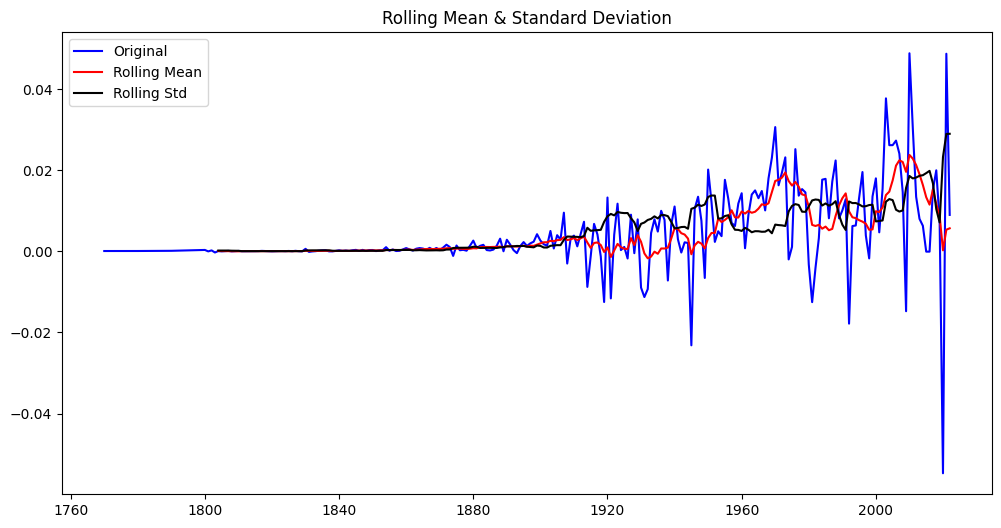

Results of Dickey-Fuller Test: 

Test Statistic                  -2.247679
p-value                          0.189398
#Lags Used                      11.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [203]:
# Removing the Trend

diff1 = world_emissions.diff(periods=1).dropna()


stationarity_check(diff1)

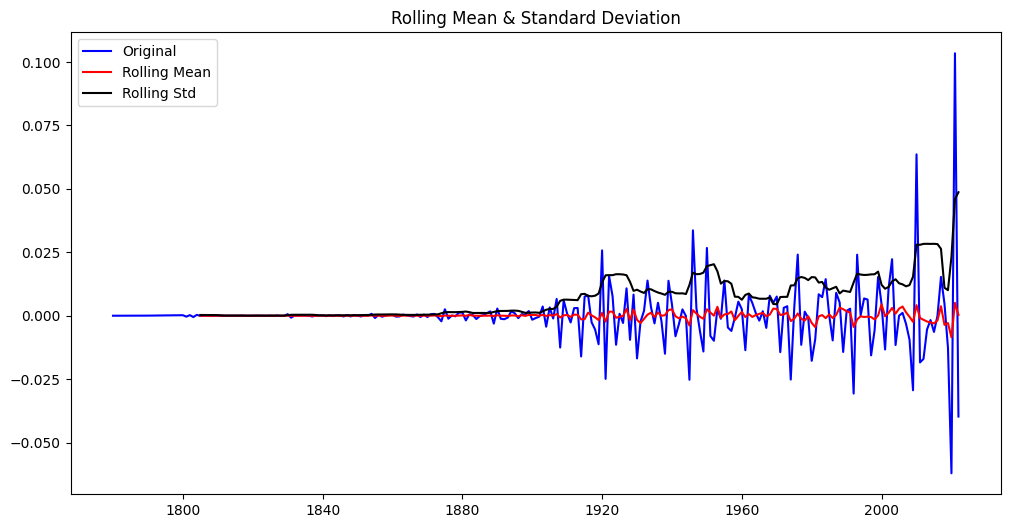

Results of Dickey-Fuller Test: 

Test Statistic                -6.308462e+00
p-value                        3.279036e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


In [204]:
# The data is not stationary, so we difference again
diff2 = diff1.diff(periods=1).dropna()

stationarity_check(diff2)

Based on the Dickey-Fuller test results, differencing has been effective in achieving stationarity in the time series  data.
The very low p-value suggests that the differenced time series is likely stationary.
The test statistic being more negative than the critical values further supports the rejection of the null hypothesis.
The number of lags used and the number of observations used provide additional context about the analysis.

#### ACF and PACF

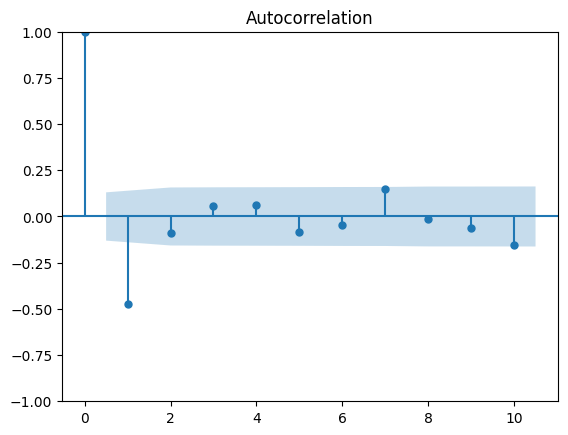

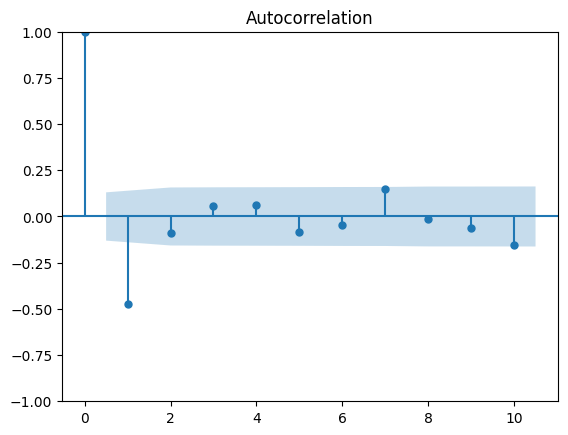

In [205]:
# Plotting ACF
plot_acf(diff2, lags=10)

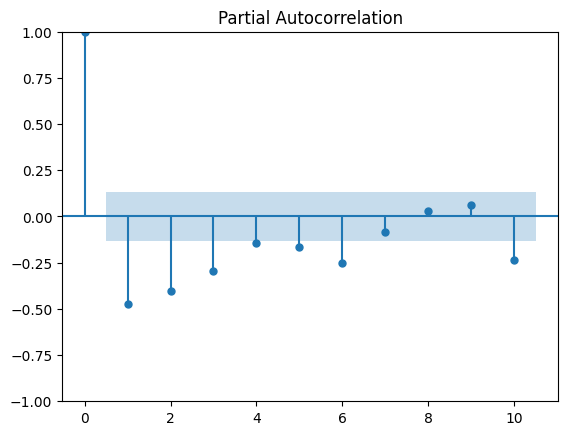

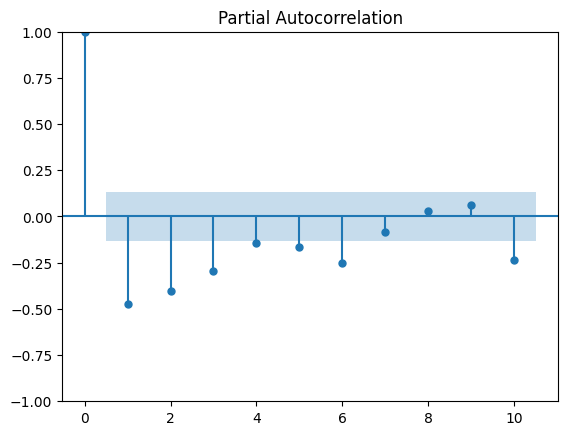

In [206]:
# PACF
plot_pacf(diff2, lags=10)

#### Baseline Model

In [207]:
# Splitting the data for a better model evaluation
train_size = int(len(diff2) * 0.8)
train, test = diff2.iloc[:train_size], diff2.iloc[train_size:]
print(train.shape)
print(test.shape)

(180, 1)
(45, 1)


Given the ACF and PACF charts, we will create an ARIMA(1,0,1) as our baseline model. 

In [208]:
baseline = ARIMA(train, order=(1,0,1))
res_arima = baseline.fit()

y_hat = res_arima.forecast(steps=len(test))

print(res_arima.summary())


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.p

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  180
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 685.141
Date:                Wed, 07 Feb 2024   AIC                          -1362.281
Time:                        23:57:34   BIC                          -1349.509
Sample:                             0   HQIC                         -1357.103
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.997e-05    5.1e-05      1.569      0.117   -1.99e-05       0.000
ar.L1          0.0034      0.048      0.071      0.943      -0.091       0.098
ma.L1         -0.8811      0.025    -34.624      0.0

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [209]:
# Calculating RMSE and MSE
def metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_squared_error(y_test, y_pred)
    print(f' RMSE:{rmse}\nMAE:{mae}')

In [210]:
# Checking the metrics
metrics(test, y_hat)

 RMSE:0.024251388344712705
MAE:0.0005881298366460672


The RMSE and MAE are significantly high, thus we try other ARIMA models.

In [211]:
# def find_best_params(data, p_range, d_range, q_range):
#     best_params = None
#     best_rmse = float('inf')
#     best_mae = float('inf')
    
#     for p in p_range:
#         for d in d_range:
#             for q in q_range:
#                 try:
#                     # Fit ARIMA model
#                     model = ARIMA(data, order=(p, d, q))
#                     result = model.fit()
                    
#                     # Generate predictions
#                     forecast = result.forecast(steps=len(data))
                    
#                     # Calculate RMSE and MAE
#                     rmse = sqrt(mean_squared_error(data, forecast))
#                     mae = mean_absolute_error(data, forecast)
                    
#                     # Update best parameters if RMSE or MAE is lower
#                     if rmse < best_rmse and mae < best_mae:
#                         best_params = (p, d, q)
#                         best_rmse = rmse
#                         best_mae = mae
#                 except:
#                     continue
                
#     return best_params, best_rmse, best_mae

In [212]:
# Creating a loop to iterate over various pdq combinations and return one which is best performing. 

p = range(0,10)
d = range(0,10)
q = range(0,3)

from math import sqrt
import itertools

pdq_combinations = list(itertools.product(p, d, q))

rmse = []
order = []

for pdq in pdq_combinations:
    try:
        model = ARIMA(train, order=pdq).fit()
        y_hat = model.forecast(steps=len(test))
        error = np.sqrt(mean_squared_error(test, y_hat))
        order.append(pdq)
        rmse.append(error)
    except: 
        continue



c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:83

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base

In [213]:
results = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
min_value_order = results.idxmin().values[0]
print(min_value_order)

(6, 0, 1)


The loop indicates that the best performing model is an ARIMA(3,1,2). We now chek this model. 

In [216]:
final_model = ARIMA(train, order=(3, 1, 2))
res_arimal_final = final_model.fit()
y_hat_final = res_arimal_final.forecast(steps=len(test))
res_arimal_final.summary()

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  180
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 662.815
Date:                Thu, 08 Feb 2024   AIC                          -1313.631
Time:                        00:04:54   BIC                          -1294.506
Sample:                             0   HQIC                         -1305.876
                                - 180                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5156      0.959     -1.580      0.114      -3.395       0.364
ar.L2         -1.0027      0.585     -1.715      0.086      -2.149       0.143
ar.L3         -0.4165      0.466     -0.894      0.371      -1.329       0.496
ma.L1         -0.0680      0.976     -0.070      0.944      -1.981       1.845
ma.L2         -0.9137      0.947     -0.965      0.335      -2.770       0.943
sigma2      3.438e-05   2.87e-06     11.976      0.000    2.87e-05       4e-05
===================================================================================
Ljung-Box (L1) (Q):                   4.27   Jarque-Bera (JB):               122.68
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):            2021.06   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
# Checking the metrics
metrics(test, y_hat_final)

 RMSE:0.024242011454641797
MAE:0.0005876751193669841


An ARIMA model is a poor fit hence we explore other models

In [218]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit simple exponential smoothing model
model = SimpleExpSmoothing(train)
result = model.fit()

# Forecast using the fitted model
y_hat_ets = result.forecast(len(test))


c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Brandon\Documents\Python\Moringa Labs\projects\Carbon-credits-chronicles\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [219]:
metrics(test, y_hat_ets)

 RMSE:0.02425183925652582
MAE:0.0005881517073243668
